In [1]:
import os
os.chdir('C:\\Users\gmoor\Documents\Economic Analytics 1\Data')

In [2]:
import numpy as np 
import pandas as pd
import math

In [3]:
raw0 = pd.read_csv('College.csv')

In [4]:
raw0.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# Convert "private" variable to a dummy using a built-in function
raw0['Private']=pd.get_dummies(raw0['Private'],drop_first=True,dtype=float)

In [6]:
raw0.Private

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
772    0.0
773    1.0
774    1.0
775    1.0
776    1.0
Name: Private, Length: 777, dtype: float64

In [7]:
# Change the column name perc.alumni
raw0.rename(columns = {'perc.alumni':'palumni'}, inplace = True)

In [8]:
raw0.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,palumni,Expend,Grad.Rate
0,Abilene Christian University,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### <font color='green'> Plotting Library: matplotlib.pyplot

* matplotlib.pyplot is a collection of functions for creating static, animated, and interactive visualizations in Python.
    
    1. Introduction: https://matplotlib.org/tutorials/index.html

    2. Useful examples and codes: https://matplotlib.org/gallery/index.html
    
    3. Style reference: https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

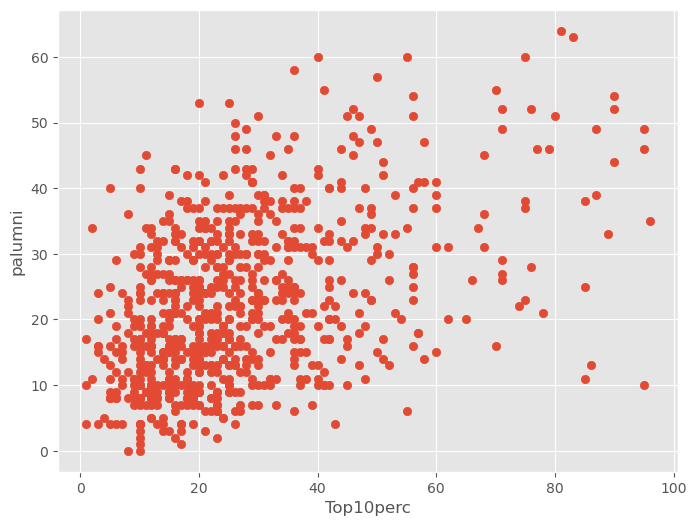

In [9]:
# Simple scatter plot
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter('Top10perc', 'palumni', data=raw0)
plt.xlabel('Top10perc')
plt.ylabel('palumni')
#plt.savefig('scatter.png') # Will save picture of scatter plot into your data folder
plt.show()

### <font color='green'> Running OLS usig "statsmodels"

* statsmodels.formula.api provides an interface for specifying models using formula strings and DataFrames. 
  (API reference: https://www.statsmodels.org/stable/api.html) 

* Useful examples and codes: https://www.statsmodels.org/stable/examples/index.html

In [10]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Fit a regression model
OLSres = smf.ols('palumni ~ Top10perc + Outstate', data=raw0).fit()

In [11]:
# A summary of the result
print(OLSres.summary())

                            OLS Regression Results                            
Dep. Variable:                palumni   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.21e-72
Time:                        18:37:44   Log-Likelihood:                -2891.5
No. Observations:                 777   AIC:                             5789.
Df Residuals:                     774   BIC:                             5803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2776      1.001      4.273      0.0

In [12]:
# interaction and higer order terms
OLSres = smf.ols('palumni ~ np.power(Top10perc,2) + Top10perc:Outstate', data=raw0).fit()
print(OLSres.summary())

                            OLS Regression Results                            
Dep. Variable:                palumni   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           4.64e-67
Time:                        18:37:44   Log-Likelihood:                -2904.4
No. Observations:                 777   AIC:                             5815.
Df Residuals:                     774   BIC:                             5829.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14

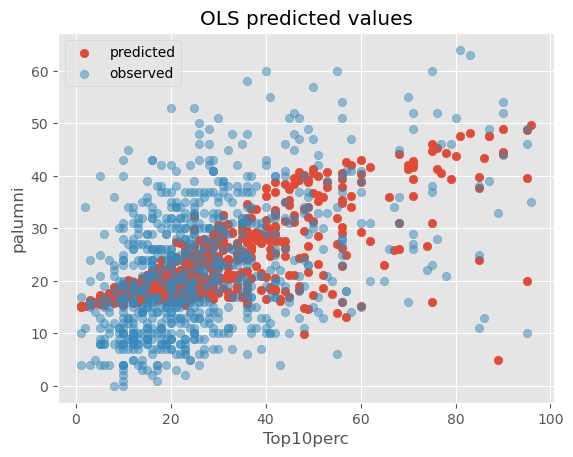

In [13]:
# Scatterplot fitted(predicted) values (palumni ~ Top10perc)

plt.scatter(raw0['Top10perc'], OLSres.predict(), alpha=1, label='predicted') # fitted / alpha changes the transparency of the plotted points
plt.scatter(raw0['Top10perc'], raw0['palumni'], alpha=0.5, label='observed') # original

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Top10perc')
plt.ylabel('palumni')
plt.show()

In [14]:
# Access individual estimate: 
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults

OLSres.params # parameter estimates

Intercept                 14.892000
np.power(Top10perc, 2)    -0.003948
Top10perc:Outstate         0.000037
dtype: float64

In [15]:
### <font color='green'> Making a table for multiple regressions using "statsmodels.iolib.summary2"

In [16]:
OLS1 = smf.ols('palumni ~ Top10perc', data=raw0).fit()
OLS2 = smf.ols('palumni ~ Top10perc + Private + Outstate', data=raw0).fit()
OLS3 = smf.ols('palumni ~ Top10perc + Private + Outstate + Personal + Expend', data=raw0).fit()

In [17]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'BIC' : lambda x: x.bic,
    'No. observations' : lambda x: f"{int(x.nobs)}"}

# "dictionary" is another way to store data, which use "keys" to index elements (instead of numbers): key-value pair
# e.g., A = {"BIC":40} and then type A["BIC"] to get 40
# e.g., A = [40,50,60] and then type A[0] to get 40

# lambda is a function to define a function, which define a parameter then a function: https://www.w3schools.com/python/python_lambda.asp

results_table = summary_col(results=[OLS1,OLS2,OLS3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            # info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'Top10perc',
                                             'Private',
                                             'Outstate',
                                             'Personal',
                                             'Expend'])

results_table.add_title('OLS Regressions')

print(results_table)

            OLS Regressions
               Model 1  Model 2 Model 3 
----------------------------------------
Intercept      13.93*** 3.74*** 7.94*** 
               (0.73)   (0.99)  (1.43)  
Top10perc      0.32***  0.17*** 0.18*** 
               (0.02)   (0.02)  (0.03)  
Private                 5.50*** 4.86*** 
                        (0.97)  (0.98)  
Outstate                0.00*** 0.00*** 
                        (0.00)  (0.00)  
Personal                        -0.00***
                                (0.00)  
Expend                          -0.00   
                                (0.00)  
R-squared      0.21     0.37    0.39    
R-squared Adj. 0.21     0.37    0.38    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### <font color='darkred'> HW2: Pick five combinations of the regressors to explain the percent of alumni. The regressors may include interactions of two variables or squared/cubed variables. 
    
1. Run five regressions with each combination
2. Produce a table summarizing the results of your five regressions as above
    
### One of you will present your regression results in the coming python session. Please check/interpret your regression results carefully

In [18]:
# Number 1

import statsmodels.formula.api as smf
import pandas as pd

# Define the 5 different regression models
# Basic Model, Top10perc and Outstate are regressors
OLS1 = smf.ols('palumni ~ Top10perc + Outstate', data=raw0).fit()

# Same as above, but adding Private to the regressors
OLS2 = smf.ols('palumni ~ Top10perc + Outstate + Private', data=raw0).fit()

# Same as above, but adding Apps to the regressors
OLS3 = smf.ols('palumni ~ Top10perc + Outstate + Private + Apps', data=raw0).fit()

# Introducing an interaction term between Top10perc and Outstate
OLS4 = smf.ols('palumni ~ Top10perc + Outstate + Top10perc:Outstate', data=raw0).fit()

# Adding Expend to the regressors from Model 2
OLS5 = smf.ols('palumni ~ Top10perc + Outstate + Private + Expend', data=raw0).fit()

In [19]:
# Number 2

from statsmodels.iolib.summary2 import summary_col

info_dict={'BIC' : lambda x: x.bic,
    'No. observations' : lambda x: f"{int(x.nobs)}"}

# Building table with each regression result 
results_table = summary_col(results=[OLS1, OLS2, OLS3, OLS4, OLS5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
                            regressor_order=['Intercept', 'Top10perc', 'Outstate', 'Private', 
                                             'Personal', 'Expend', 'Top10perc:Outstate'])

results_table.add_title('OLS Regressions for Percent of Alumni')

print(results_table)

           OLS Regressions for Percent of Alumni
                   Model 1 Model 2 Model 3  Model 4 Model 5
-----------------------------------------------------------
Intercept          4.28*** 3.74*** 5.23***  3.99**  3.76***
                   (1.00)  (0.99)  (1.02)   (1.90)  (0.99) 
Top10perc          0.14*** 0.17*** 0.21***  0.15**  0.18***
                   (0.02)  (0.02)  (0.03)   (0.06)  (0.03) 
Outstate           0.00*** 0.00*** 0.00***  0.00*** 0.00***
                   (0.00)  (0.00)  (0.00)   (0.00)  (0.00) 
Private                    5.50*** 2.77**           5.45***
                           (0.97)  (1.12)           (0.98) 
Expend                                              -0.00  
                                                    (0.00) 
Top10perc:Outstate                          -0.00          
                                            (0.00)         
Apps                               -0.00***                
                                   (0.00)          